In [ ]:
import numpy as nm  
import matplotlib.pyplot as mtp 
import pandas as pd
data_set= pd.read_csv('ishita.csv')


In [ ]:
data_set.head()

,country,year,loss,Unnamed: 3
0,Burundi,2020,2.00,NaN
1,Burundi,2020,1.18,NaN
2,Burundi,2020,2.50,NaN
3,Burundi,2020,2.50,NaN
4,Burundi,2020,3.50,NaN


In [ ]:
x= data_set.iloc[:, :-2].values  
y= data_set.iloc[:, 2].values
print(x)
print(y)

[['Burundi' 2020]
 ['Burundi' 2020]
 ['Burundi' 2020]
 ...
 ['Zambia' 2000]
 ['Zambia' 2000]
 ['Zambia' 2000]]
[2.   1.18 2.5  ... 1.   2.38 3.44]


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train1=sc.fit_transform(x_train)
x_test1=sc.transform(x_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 3)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y) 

In [ ]:
y_pred= reg1.predict(x_test)  
x_pred= reg1.predict(x_train)  



In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
print(pred_df)

      Actual Value  Predicted Value  Difference
0             2.21         2.088285    0.121715
1             2.50         2.231133    0.268867
2             3.50         2.253987    1.246013
3             3.50         2.141932    1.358068
4             2.50         2.091142    0.408858
...            ...              ...         ...
1100          2.50         2.172406    0.327594
1101          2.50         2.136852    0.363148
1102          2.50         2.169232    0.330768
1103          2.50         2.159391    0.340609
1104          2.00         2.058763   -0.058763

[1105 rows x 3 columns]


In [ ]:
#SVR
from sklearn.svm import SVR
reg2=SVR(kernel='rbf')
reg2.fit(x_train,y_train)

SVR()

In [ ]:
y_pred1= reg2.predict(x_test)
x_pred1= reg2.predict(x_train)

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred1,'Difference':y_test-y_pred1})
print(pred_df)

      Actual Value  Predicted Value  Difference
0             2.21         2.099994    0.110006
1             2.50         2.100089    0.399911
2             3.50         2.099969    1.400031
3             3.50         2.099994    1.400006
4             2.50         2.099979    0.400021
...            ...              ...         ...
1100          2.50         2.100003    0.399997
1101          2.50         2.099908    0.400092
1102          2.50         2.100076    0.399924
1103          2.50         2.100015    0.399985
1104          2.00         2.099980   -0.099980

[1105 rows x 3 columns]


In [ ]:
#random forrest
from sklearn.ensemble import RandomForestRegressor
reg3=RandomForestRegressor(n_estimators=100,random_state=0)
reg3.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred2=reg3.predict(x_test)

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred2,'Difference':y_test-y_pred2})
print(pred_df)

      Actual Value  Predicted Value  Difference
0             2.21         1.871419    0.338581
1             2.50         2.435183    0.064817
2             3.50         1.492840    2.007160
3             3.50         1.795678    1.704322
4             2.50         2.294051    0.205949
...            ...              ...         ...
1100          2.50         2.122245    0.377755
1101          2.50         1.897352    0.602648
1102          2.50         2.176706    0.323294
1103          2.50         1.605163    0.894837
1104          2.00         1.935015    0.064985

[1105 rows x 3 columns]


In [ ]:
from sklearn.metrics import r2_score
print('accuracy of LR',r2_score(y_test,y_pred))
print('accuracy of SVR',r2_score(y_test,y_pred1))
print('accuracy of DT',r2_score(y_test,y_pred2))

accuracy of LR -0.006520744518225818
accuracy of SVR -3.4804485196993085e-05
accuracy of DT -0.558633904822958


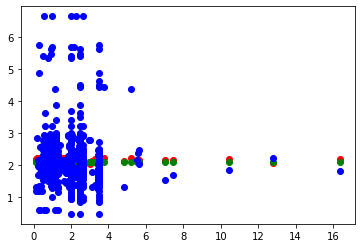

In [ ]:
mtp.scatter(y_test,y_pred,color='red')
mtp.scatter(y_test,y_pred1,color='green')
mtp.scatter(y_test,y_pred2,color='blue')